In [120]:
import pandas as pd
import numpy as np

In [121]:
dataset = pd.read_csv("/content/News Category Dataset.csv",)

In [122]:
dataset.shape

(2857, 3)

In [123]:
dataset.head()

,Unnamed: 0,news,category
0,0,worldcom ex-boss launches defence lawyers defe...,business
1,1,german business confidence slides german busin...,business
2,2,bbc poll indicates economic gloom citizens in ...,business
3,3,lifestyle governs mobile choice faster bett...,tech
4,4,enron bosses in $168m payout eighteen former e...,business


In [124]:
dataset.loc[0, 'news']

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

In [125]:
dataset = dataset.drop("Unnamed: 0", axis = 1)

In [126]:
dataset.head()

,news,category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


In [127]:
dataset.loc[1, "news"]

'german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy.  munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january  its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up.   we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner.  the main reason is probably that the domestic economy is still weak  particularly in the retail trade.  economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline . he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue.  germany s economy grew 1.

In [128]:
dataset['category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [129]:
dataset['category'].value_counts()

,count
category,
politics,748
sport,698
business,592
entertainment,440
tech,379


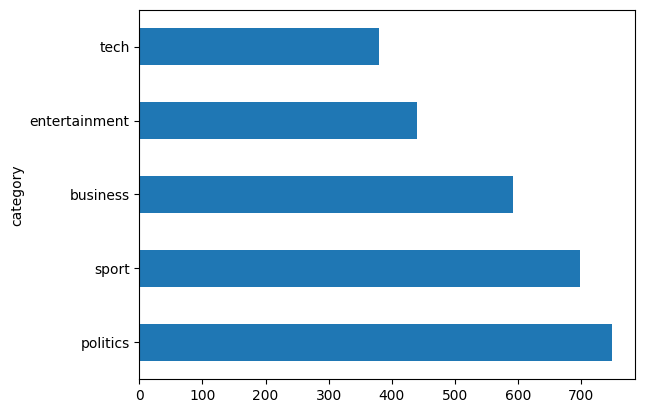

In [130]:
import matplotlib.pyplot as plt
dataset['category'].value_counts().plot(kind='barh')
plt.show()

In [131]:
dataset.isnull().sum()

,0
news,0
category,0


### Text Preprocessing

In [132]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


def text_preprocess(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z]", " ", text)

    token = word_tokenize(text) # ["i", "am", "human"]
    stop = stopwords.words("english")
    token = [word for word in token if word not in stop]
    token = [WordNetLemmatizer().lemmatize(word) for word in token]

    return token

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [133]:
# for i in range(len(dataset)):
#   dataset.loc[i, 'news'] = text_preprocess(dataset.loc[i, 'news'])

In [134]:
dataset["preprocessed_news"] = dataset['news'].apply(lambda x: text_preprocess(x))
dataset.head(10)

,news,category,preprocessed_news
0,worldcom ex-boss launches defence lawyers defe...,business,"[worldcom, ex, bos, launch, defence, lawyer, d..."
1,german business confidence slides german busin...,business,"[german, business, confidence, slide, german, ..."
2,bbc poll indicates economic gloom citizens in ...,business,"[bbc, poll, indicates, economic, gloom, citize..."
3,lifestyle governs mobile choice faster bett...,tech,"[lifestyle, governs, mobile, choice, faster, b..."
4,enron bosses in $168m payout eighteen former e...,business,"[enron, boss, payout, eighteen, former, enron,..."
5,howard truanted to play snooker conservative...,politics,"[howard, truanted, play, snooker, conservative..."
6,wales silent on grand slam talk rhys williams ...,sport,"[wale, silent, grand, slam, talk, rhys, willia..."
7,french honour for director parker british film...,entertainment,"[french, honour, director, parker, british, fi..."
8,car giant hit by mercedes slump a slump in pro...,business,"[car, giant, hit, mercedes, slump, slump, prof..."
9,fockers fuel festive film chart comedy meet th...,entertainment,"[fockers, fuel, festive, film, chart, comedy, ..."


In [135]:
print(dataset.loc[0, 'news'])
print(dataset.loc[0, 'preprocessed_news'])

worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebbe

In [136]:
def total_word_freq(df):
    words = [word for tokens in df["preprocessed_news"] for word in tokens]

    count = {}
    for word in words:
        if word in count:
            count[word] += 1
        else:
            count[word] = 1

    return sorted(count.items(), key=lambda x: x[1], reverse=True)

In [137]:
len(total_word_freq(dataset))

22726

In [138]:
total_word_freq(dataset)[:10]

[('said', 5026),
 ('year', 2330),
 ('mr', 2021),
 ('would', 1763),
 ('new', 1493),
 ('also', 1442),
 ('u', 1427),
 ('people', 1375),
 ('one', 1347),
 ('time', 1141)]

In [139]:
dataset['category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [140]:
def word_freq(df, category):

    cat_df = df[df["category"] == category]

    words = [word for tokens in cat_df["preprocessed_news"] for word in tokens]

    count = {}
    for word in words:
        if word in count:
            count[word] += 1
        else:
            count[word] = 1

    return sorted(count.items(), key=lambda x: x[1], reverse=True)

In [141]:
word_freq(dataset, 'sport')[:20]

[('said', 652),
 ('game', 563),
 ('year', 475),
 ('first', 397),
 ('win', 379),
 ('time', 363),
 ('player', 360),
 ('england', 330),
 ('two', 315),
 ('back', 298),
 ('world', 293),
 ('one', 284),
 ('last', 271),
 ('final', 265),
 ('team', 264),
 ('second', 249),
 ('match', 242),
 ('would', 241),
 ('play', 230),
 ('new', 229)]

In [142]:
dataset['category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [143]:
word_freq(dataset, 'business')[:10]

[('said', 1126),
 ('year', 666),
 ('u', 588),
 ('bn', 535),
 ('company', 419),
 ('mr', 396),
 ('firm', 382),
 ('market', 362),
 ('would', 324),
 ('new', 311)]

In [144]:
dataset['preprocessed_news2'] = dataset['preprocessed_news'].apply(' '.join)
dataset.head()

,news,category,preprocessed_news,preprocessed_news2
0,worldcom ex-boss launches defence lawyers defe...,business,"[worldcom, ex, bos, launch, defence, lawyer, d...",worldcom ex bos launch defence lawyer defendin...
1,german business confidence slides german busin...,business,"[german, business, confidence, slide, german, ...",german business confidence slide german busine...
2,bbc poll indicates economic gloom citizens in ...,business,"[bbc, poll, indicates, economic, gloom, citize...",bbc poll indicates economic gloom citizen majo...
3,lifestyle governs mobile choice faster bett...,tech,"[lifestyle, governs, mobile, choice, faster, b...",lifestyle governs mobile choice faster better ...
4,enron bosses in $168m payout eighteen former e...,business,"[enron, boss, payout, eighteen, former, enron,...",enron boss payout eighteen former enron direct...


In [145]:
dataset.loc[10, 'preprocessed_news2']

'blair reject iraq advice call tony blair rejected call publication advice legality iraq war amid growing call investigation prime minister told monthly press conference matter dealt attorney general earlier conservative mp michael mate joined call probe claim lord goldsmith statement parliament drawn number mr blair said statement fair summary lord goldsmith opinion lord goldsmith said say dealt time time time mr blair told monthly news conference downing street refused answer question issue saying dealt literally score time position changed lord goldsmith denied leaned say word written government refuse publish advice legality war saying paper always kept confidential mr mate member common intelligence security committee part butler inquiry pre war intelligence told bbc friday general rule right absolute rule said occasion advice published recently regarding prince charles marriage plan government could pick choose use convention said mr mate added discovered two three occasion past 

#### Train the model and prediction

In [146]:
test_dataset = pd.read_csv("/content/test_dataset.csv")

In [147]:
test_dataset.columns

Index(['Unnamed: 0', 'ArticleId', 'Text', 'preprocessed_news'], dtype='object')

In [148]:
test_dataset.head()

,Unnamed: 0,ArticleId,Text,preprocessed_news
0,0,1018,qpr keeper day heads for preston queens park r...,"['qpr', 'keeper', 'day', 'head', 'preston', 'q..."
1,1,1319,software watching while you work software that...,"['software', 'watching', 'work', 'software', '..."
2,2,1138,d arcy injury adds to ireland woe gordon d arc...,"['arcy', 'injury', 'add', 'ireland', 'woe', 'g..."
3,3,459,india s reliance family feud heats up the ongo...,"['india', 'reliance', 'family', 'feud', 'heat'..."
4,4,1020,boro suffer morrison injury blow middlesbrough...,"['boro', 'suffer', 'morrison', 'injury', 'blow..."


In [149]:
test_dataset = test_dataset.drop(['Unnamed: 0', 'ArticleId', 'preprocessed_news'], axis = 1)

In [150]:
test_dataset.head()

,Text
0,qpr keeper day heads for preston queens park r...
1,software watching while you work software that...
2,d arcy injury adds to ireland woe gordon d arc...
3,india s reliance family feud heats up the ongo...
4,boro suffer morrison injury blow middlesbrough...


In [151]:
test_dataset.columns

Index(['Text'], dtype='object')

In [152]:
test_dataset.columns = ['news']

In [153]:
test_dataset.head(10)

,news
0,qpr keeper day heads for preston queens park r...
1,software watching while you work software that...
2,d arcy injury adds to ireland woe gordon d arc...
3,india s reliance family feud heats up the ongo...
4,boro suffer morrison injury blow middlesbrough...
5,lewsey puzzle over disallowed try england s jo...
6,former ni minister scott dies former northern ...
7,career honour for actor dicaprio actor leonard...
8,tsunami to hit sri lanka banks sri lanka s b...
9,us economy still growing says fed most areas o...


In [154]:
test_dataset["preprocessed_news"] = test_dataset['news'].apply(lambda x: text_preprocess(x))

In [155]:
test_dataset.head(5)

,news,preprocessed_news
0,qpr keeper day heads for preston queens park r...,"[qpr, keeper, day, head, preston, queen, park,..."
1,software watching while you work software that...,"[software, watching, work, software, monitor, ..."
2,d arcy injury adds to ireland woe gordon d arc...,"[arcy, injury, add, ireland, woe, gordon, arcy..."
3,india s reliance family feud heats up the ongo...,"[india, reliance, family, feud, heat, ongoing,..."
4,boro suffer morrison injury blow middlesbrough...,"[boro, suffer, morrison, injury, blow, middles..."


In [156]:
test_dataset['preprocessed_news2'] = test_dataset['preprocessed_news'].apply(' '.join)
test_dataset.head()

,news,preprocessed_news,preprocessed_news2
0,qpr keeper day heads for preston queens park r...,"[qpr, keeper, day, head, preston, queen, park,...",qpr keeper day head preston queen park ranger ...
1,software watching while you work software that...,"[software, watching, work, software, monitor, ...",software watching work software monitor every ...
2,d arcy injury adds to ireland woe gordon d arc...,"[arcy, injury, add, ireland, woe, gordon, arcy...",arcy injury add ireland woe gordon arcy ruled ...
3,india s reliance family feud heats up the ongo...,"[india, reliance, family, feud, heat, ongoing,...",india reliance family feud heat ongoing public...
4,boro suffer morrison injury blow middlesbrough...,"[boro, suffer, morrison, injury, blow, middles...",boro suffer morrison injury blow middlesbrough...


In [157]:
X_train = dataset['preprocessed_news2']
y_train = dataset['category']
X_test = test_dataset['preprocessed_news2']

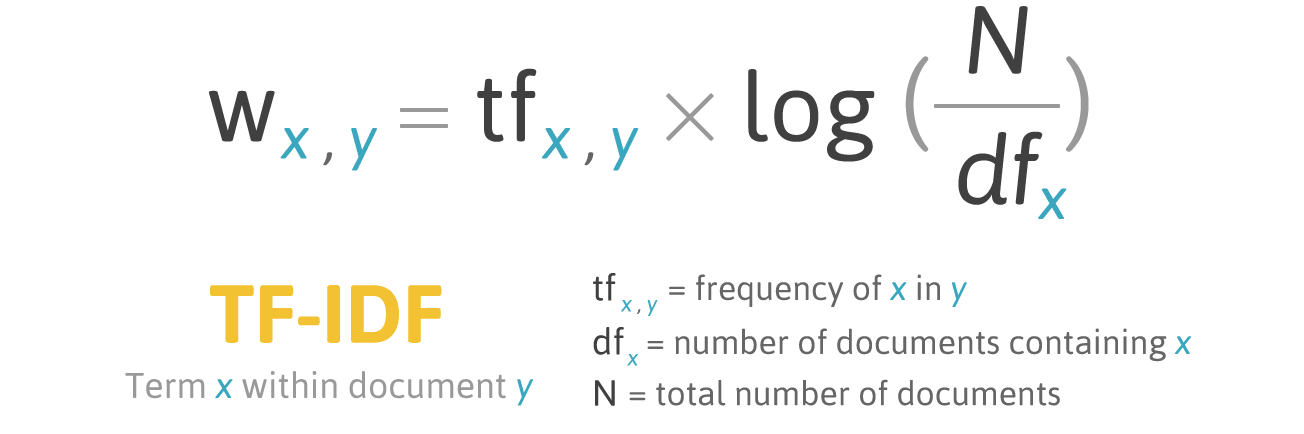

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(use_idf=True)
train_features =tfidf_vectorizer.fit_transform(X_train) # First Fit the document; then Transform

test_features =tfidf_vectorizer.transform(X_test)

In [159]:
train_features.shape

(2857, 22704)

In [160]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=train_features[2]

# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"]) # use get_feature_names_out()
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
country,0.316430
respondent,0.281915
economy,0.262035
poll,0.228972
world,0.207117
...,...
financed,0.000000
finance,0.000000
finally,0.000000
finalized,0.000000


In [162]:
def model_function(model, train_features, y_train):
    model.fit(train_features, y_train)
    return model

In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

sv = svm.SVC()
tree = DecisionTreeClassifier()
nb = MultinomialNB()


sv_model = model_function(sv, train_features, y_train)
tree_model = model_function(tree, train_features, y_train)
nb_model = model_function(nb, train_features, y_train)

In [164]:
sv_prediction = sv_model.predict(test_features)

In [166]:
len(test_dataset)

685

In [168]:
n = 2
print(f"{ sv_prediction[n]} : {X_test[n]}")

sport : arcy injury add ireland woe gordon arcy ruled ireland team saturday six nation clash scotland murrayfield like skipper brian driscoll arcy failed recover hamstring injury side led munster lock paul connell shane horgan switch wing centre joined ulster kevin maggs girvan dempsey come team take right wing spot gavin duffy called replacement gave gordon chance work said ireland coach eddie sullivan term risk element sensible precaution fine next game want tempt fate maggs win th cap obvious replacement centre shane horgan always likely moved wing change ireland side last weekend win rome see wasp flanker johnny connor replacing denis leamy connor winning third cap making debut victory south africa last november murphy dempsey horgan maggs hickie gara stringer corrigan byrne hayes kelly connell capt easterby connor foley sheahan horan callaghan miller g easterby humphreys duffy


# Name Entity Recognition


*   First we will Tokenize the text
*   Second we will find the POS tag
*   Third we will find the NER




In [171]:
%%capture
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def get_NER(text):
  pos_tagging = pos_tag( word_tokenize(text) )
  chunked = ne_chunk( pos_tagging )
  continuous_chunk = []
  current_chunk = []
  for i in chunked:
    if type(i) == Tree:
            current_chunk.append(" ".join([token for token, pos in i.leaves()]))
    elif current_chunk:
            named_entity = " ".join(current_chunk)
            if named_entity not in continuous_chunk:
                    continuous_chunk.append(named_entity)
                    current_chunk = []
    else:
      continue
  return continuous_chunk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [172]:
text = "The Taj Mahal is an ivory-white marble mausoleum on the right bank of the river Yamuna in Agra, Uttar Pradesh, India."
get_NER(text)

['Taj Mahal', 'Agra', 'Uttar Pradesh', 'India']